In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

from keras import backend as K
import matplotlib.pyplot as plt
import re
import hexdump

print("TensorFlow version: {}".format(tf.__version__))

Using TensorFlow backend.


TensorFlow version: 2.1.1


(500, 2)
(500,)


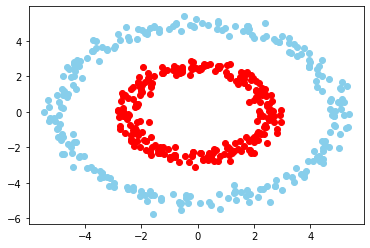

In [5]:
X , Y  = make_circles(n_samples=500, factor=0.5, noise=0.05)
X = 5*X

plt.scatter(X[Y==0,0],X[Y==0,1],c="skyblue")
plt.scatter(X[Y==1,0],X[Y==1,1],c="red")

print(np.shape(X))
print(np.shape(Y))

In [118]:
kp = 1
n1 = np.arange(0,220,kp)
n2 = np.arange(0,220,kp)
n3 = np.arange(0,220,kp)
n4 = np.arange(0,220,kp)
n5 = np.arange(0,220,kp)
n6 = np.arange(0,220,kp)
n7 = np.arange(0,220,kp)
n8 = np.arange(0,220,kp)

X = np.transpose([n1,n2,n3,n4,n5,n6,n7,n8])
Y = np.random.randint(0,2,size=[np.shape(X)[0],3])

np.shape(X)

(220, 8)

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=23)


X_train_1 = K.cast_to_floatx (X_train)
X_test_1 = K.cast_to_floatx (X_test)
y_train_1 = K.cast_to_floatx (y_train)

In [120]:
# El modelo
model= tf.keras.Sequential()

model.add(layers.Dense(32, activation='sigmoid', input_dim=8))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

# Configulación del entrenamiento
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_90 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_91 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_92 (Dense)             (None, 3)                 27        
Total params: 979
Trainable params: 979
Non-trainable params: 0
_________________________________________________________________


Iniciar el entrenamiento
Train on 176 samples
Epoch 1/100
176/176 [==============================] - 1s 3ms/sample - loss: 0.2583 - accuracy: 0.5795
Epoch 2/100
176/176 [==============================] - 0s 2ms/sample - loss: 0.2517 - accuracy: 0.4148
Epoch 3/100
176/176 [==============================] - 0s 2ms/sample - loss: 0.2500 - accuracy: 0.4716
Epoch 4/100
176/176 [==============================] - 0s 1ms/sample - loss: 0.2510 - accuracy: 0.5284
Epoch 5/100
176/176 [==============================] - 0s 1ms/sample - loss: 0.2497 - accuracy: 0.4375
Epoch 6/100
176/176 [==============================] - 0s 1ms/sample - loss: 0.2500 - accuracy: 0.4830
Epoch 7/100
176/176 [==============================] - 1s 3ms/sample - loss: 0.2496 - accuracy: 0.3295
Epoch 8/100
176/176 [==============================] - 0s 2ms/sample - loss: 0.2491 - accuracy: 0.2784
Epoch 9/100
176/176 [==============================] - 0s 2ms/sample - loss: 0.2491 - accuracy: 0.2784
Epoch 10/100
176/176 [=====

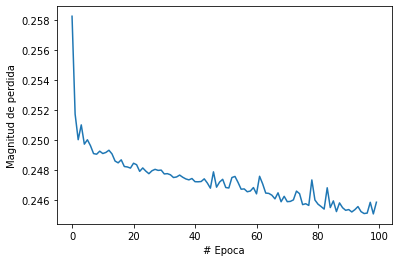

In [121]:
print("Iniciar el entrenamiento")
historial = model.fit(X_train_1,y_train_1, epochs=100,batch_size=1,verbose=True)
print("Modelo Entrenado")

plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [113]:
loss, accuracy = model.evaluate(X_test_1, y_test, verbose=0)
print("Test accuracy : " + str(accuracy))


Test accuracy : 0.3


In [122]:
model.save("saved_model/model")
print("Saved model to disk")

# load model
savedModel = load_model("saved_model/model")
savedModel.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


NotFoundError: Failed to create a directory: saved_model/model\variables; No such file or directory

In [125]:
def GenerateLiteModel(model,optimize=False):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    if optimize:
        if isinstance(optimize, bool):
            optimizers = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
        else:
            optimizers = optimize
        converter.optimizations = optimizers
    tflite_model = converter.convert()
    bytes = hexdump.dump(tflite_model).split(' ')
    c_array = ', '.join(['0x%02x' % int(byte, 16) for byte in bytes])

    return c_array.split(",")


list_datos = GenerateLiteModel(model)

file = open("model.txt",'w')
file.write("{}\n".format(len(list_datos)))

for dato in list_datos:
    file.write("{}\n".format(dato.strip()))
file.close()
print("Modelo Guardado")

Modelo Guardado


In [127]:
x1 = 114.41
x2 = 81.40
x3 = 178.21
x4 = 107.80
x5 = 200.21
x6 = 202.41
x7 = 112.21
x8 = 169.41

input = np.array([[x1,x2,x3,x4,x5,x6,x7,x8]])
model.predict(input)

array([[0.5468362 , 0.49758935, 0.46442038]], dtype=float32)